<a href="https://colab.research.google.com/github/Angebarrutia/Coderhouse-Curso-Data-Science-I-/blob/main/ProyectoDSParteI_BarrutiaAngela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENTREGA 1: Análisis Exploratorio de Datos en Telecomunicaciones

# Angela Barrutia


# **Parte 1:**

# Abstract

 El presente proyecto tiene como objetivo realizar un análisis de un conjunto de datos de **Nubyx**, empresa peruana de telecomunicaciones proveedora de internet 100% fibra óptica, específicamente relacionado con leads comerciales, planes de servicio de internet, clientes y variables geográficas. Este análisis constituye la primera etapa de un proyecto de ciencia de datos que busca preparar la base para un modelo de machine learning orientado a la optimización de estrategias comerciales y captación de leads.


 Los datos del dataset fueron registrados en los canales web entre los años 2023 y 2024, incluye variables de ubicación (REGIÓN, PROVINCIA, DISTRITO), tipo de vivienda, producto (PLAN, VELOCIDAD, PRECIO BASE), canal de adquisición (FUENTE DE INGRESO WEB) y procesos operativos (ESTADO DE COBERTURA, ESTADO DE ATENCIÓN). Esta distribución permite analizar el comportamiento de los leads en función de su ubicación y de los planes de servicio a los que aplican.


 Es importante tener en cuenta que el campo **PRECIO BASE** se asigna automáticamente al seleccionar un **PLAN**, por ello se considera como variable dependiente del plan/velocidad. Otro factor importante es la **elegibilidad por cobertura**: si un lead no tiene cobertura, no es elegible para convertirse en venta, por lo que las métricas de conversión se calculan con los leads con cobertura.

 En esta primera parte se realiza un diagnóstico exploratorio del dataset: identificación de valores nulos, análisis descriptivo de las variables, y generación de visualizaciones univariadas, bivariadas y multivariadas que permiten comprender las tendencias principales.

In [ ]:
# Se importan las librerías y se monta el drive.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coderhouse/Curso 2: Data Science I/Entrega 1: Angela Barrutia/base_nubyx_leads2023-2024.csv', encoding='latin-1', delimiter=';')
display(df.head(6))

,DATETIME,DNI O RUC,NOMBRE,TELÉFONO,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
0,2023-01-01 02:04:00,21565685.0,Arly Guerra,939970489,Ica,Ica,Ica,Casa,-14.064100,-75.729200,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
1,2023-01-01 09:29:00,70245839.0,Jean Osorio,948563326,Callao,Callao,Bellavista,Departamento,-12.053219,-77.091982,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Web Oficial,Fuera de Cobertura,Registro en Base de Datos
2,2023-01-01 18:18:00,9803211.0,Briyit Felix,952557597,Lima,Lima,Barranco,Casa,-12.153598,-77.022358,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
3,2023-01-01 18:33:00,71208988.0,Miguel Chumbimuni,961819083,Lima,Lima,Magdalena del Mar,Departamento,-12.095704,-77.071990,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,Fuera de Cobertura,Registro en Base de Datos
4,2023-01-01 18:41:00,70402129.0,Enson Fernandez,998228712,Cusco,Cusco,Cusco,Departamento,-13.523865,-71.993524,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos
5,2023-01-01 20:10:00,46411824.0,Miguel Flores,995170502,Lima,Lima,San Borja,Casa,-12.111055,-77.000180,Internet Hogar,Internet,100 Mbps,S/ 79.00,Landing Planes,Fuera de Cobertura,Registro en Base de Datos


**Conceptos a utilizar y definiciones:**

1. Lead: Persona interesada en contratar el servicio de Nubyx, prospecto de venta.

2. DNI o RUC: Identificador nacional de identidad, único para cada persona o empresa.

3. Cobertura: Disponibilidad del servicio de internet en una determinada zona geográfica (En cobertura o Fuera de cobertura).

4. Conversión: Proceso mediante el cual un lead se convierte en cliente activo.

5. Estado de Atención: Clasificación del lead según su avance en el proceso de venta.

6. Fuente de Ingreso Web: Canal digital web a través del cual se captó el lead.

7. Servicio: Tipo de servicio ofrecido; se divide en dos: Internet para el Hogar e Internet para la Empresa.

8. Plan: Paquete de internet ofrecido por Nubyx con una velocidad y precio específico.

9. Precio Base: Costo inicial del plan de internet sin descuentos ni promociones.

10. Velocidad del Plan: Capacidad de transmisión de datos en Mbps de un plan de internet.

11. Segmentación Geográfica: División del mercado en regiones, provincias y distritos para análisis.

12. Tasa de Conversión: Indicador que mide el porcentaje de leads que se convierten en clientes.

13. Tipo de Vivienda: Clasificación de las viviendas según su estructura (casa, departamento o condominio).

14. Latitud y Longitud: Coordenadas geográficas que indican la ubicación de un lead registrado.

15. Teléfono: Número de comunicación con el cliente, usualmente de 9 dígitos; puede incluir números de hogar o identificador de país a futuro.

16. Estado de Cobertura: Indica si la zona del lead tiene o no disponibilidad del servicio de internet.

17. Región / Provincia / Distrito: Segmentación geográfica de los leads.



**Estados del Lead:**

* Contrato Cerrado: Lead contrató el servicio y se convirtió en cliente activo.

* En Seguimiento: Lead interesado pero aún no disponible para contratar el servicio.

* No desea el servicio: Lead no interesado en servicio, planes o promociones.

* No responde: Lead no responde la comunicación a pesar de varios intentos.

* Registro en Base de Datos: Lead registrado para ser considerado cuando se abra cobertura en su zona.

* Ya es Cliente: Lead ya era cliente antes de la comunicación pero desea algún servicio de atención, migrar de plan, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATETIME               16567 non-null  object 
 1   DNI O RUC              16567 non-null  float64
 2   NOMBRE                 16567 non-null  object 
 3   TELÉFONO               16567 non-null  int64  
 4   REGIÓN                 16567 non-null  object 
 5   PROVINCIA              16567 non-null  object 
 6   DISTRITO               16567 non-null  object 
 7   TIPO DE VIVIENDA       16567 non-null  object 
 8   LONGITUD               16567 non-null  float64
 9   LATITUD                16567 non-null  float64
 10  SERVICIO               16567 non-null  object 
 11  PLAN                   16567 non-null  object 
 12  VELOCIDAD              16567 non-null  object 
 13  PRECIO BASE            16567 non-null  object 
 14  FUENTE DE INGRESO WEB  16567 non-null  object 
 15  ES

In [ ]:
df['DNI O RUC'] = df['DNI O RUC'].astype(str)
df['TELÉFONO'] = df['TELÉFONO'].astype(str)

In [ ]:
df['DATETIME'] = df['DATETIME'].astype('str')

In [ ]:
df['LONGITUD'] = df['LONGITUD'].astype('str')

In [ ]:
df['LATITUD'] = df['LATITUD'].astype('str')

In [ ]:
 # Identificamos los nulos

null_counts = df.isnull().sum()

if null_counts.sum() == 0:
  print("No se identificaron datos nulos")
else:
  print(null_counts)

No se identificaron datos nulos


In [ ]:
# Definimos el contenido único de cada columna

df['TIPO DE VIVIENDA'].unique()

array(['Casa', 'Departamento', 'Condominio'], dtype=object)

In [ ]:
df['SERVICIO'].unique()

array(['Internet Hogar', 'Internet Empresa'], dtype=object)

In [ ]:
df['FUENTE DE INGRESO WEB'].unique()

array(['Web Oficial', 'Landing Cobertura', 'Landing Planes',
       'Landing Promociones'], dtype=object)

In [ ]:
df['ESTADO DE COBERTURA'].unique()

array(['Fuera de Cobertura', 'En Cobertura', 'En cobertura'], dtype=object)

In [ ]:
df['ESTADO DE ATENCIÓN'].unique()

array(['Registro en Base de Datos', 'Contrato Cerrado', 'No responde',
       'En Seguimiento', 'No desea el servicio', 'Ya es Cliente'],
      dtype=object)

In [ ]:
#Se filtra solamente a los leads en cobertura para poder realizar el análisis

df_cobertura= df[df['ESTADO DE COBERTURA'] == 'En Cobertura'].copy()
display(df_cobertura.head(5))

,DATETIME,DNI O RUC,NOMBRE,TELÉFONO,REGIÓN,PROVINCIA,DISTRITO,TIPO DE VIVIENDA,LONGITUD,LATITUD,SERVICIO,PLAN,VELOCIDAD,PRECIO BASE,FUENTE DE INGRESO WEB,ESTADO DE COBERTURA,ESTADO DE ATENCIÓN
20,2023-01-02 11:49:00,44642394.0,Alexis Guevara,937634071,Lima,Lima,Miraflores,Departamento,-12.11895178,-77.03418648,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Web Oficial,En Cobertura,Contrato Cerrado
26,2023-01-02 13:00:00,41175785.0,Isaac Torres,946704116,Lima,Lima,Chorrillos,Casa,-12.19304284,-77.00847668,Internet Hogar,Dúo,500 Mbps,S/ 139.00,Landing Cobertura,En Cobertura,Contrato Cerrado
27,2023-01-02 13:36:00,72186721.0,Susana Medina,983991264,Lima,Lima,Ate,Casa,-12.1176064,-76.9982464,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Planes,En Cobertura,Contrato Cerrado
46,2023-01-02 18:27:00,43524889.0,William Württele,958686228,Lima,Lima,Barranco,Casa,-12.1410739,-77.0218907,Internet Hogar,Dúo,100 Mbps,S/ 99.00,Landing Cobertura,En Cobertura,Contrato Cerrado
63,2023-01-03 10:51:00,47553922.0,Gary Lopez,909260774,Lima,Lima,Chorrillos,Departamento,-12.17134014,-77.0262602,Internet Hogar,Dúo,200 Mbps,S/ 119.00,Landing Cobertura,En Cobertura,Contrato Cerrado


# **Parte 2:**

# Hipótesis

# 1. ¿Qué regiones tienen la mayor cantidad de leads registrados y cómo varía la probabilidad de conversión por región/provincia/distrito?

Hipótesis: Los leads registrados se concentran principalmente en el distrito de Lima/ provincia de Lima/ región de Lima y este distrito presenta una mayor probabilidad de conversión.

Conclusión: El análisis indica que la mayoría de los leads se concentra en la Región Lima, especialmente en la Provincia Lima, y que estos distritos presentan una mayor cantidad de leads y una gran cantidad de leads convertidos. Sin embargo, al haber mayor volumen de leads hay una tasa de conversión media.  Esto sugiere que la ubicación geográfica puede estimar la probabilidad de que un lead se convierta en cliente.

In [ ]:
# Calculamos el total de Leads totales y convertidos por región usando groupby
region_conversion = df_cobertura.groupby('REGIÓN').agg(
    Leads_Totales=('REGIÓN', 'size'),
    Leads_Convertidos=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

# Calculamos la tasa de conversión por región
region_conversion['Tasa de Conversión(%)'] = (region_conversion['Leads_Convertidos'] / region_conversion['Leads_Totales']) * 100

# Mostramos el resultado ordenado por Leads Totales
display(region_conversion.sort_values(by='Leads_Totales', ascending=False))

,REGIÓN,Leads_Totales,Leads_Convertidos,Tasa de Conversión(%)
5,Lima,4263,4106,96.317148
1,Arequipa,211,210,99.526066
4,Ica,180,170,94.444444
0,Callao,153,153,100.000000
3,Cusco,66,66,100.000000
2,Callao,31,28,90.322581


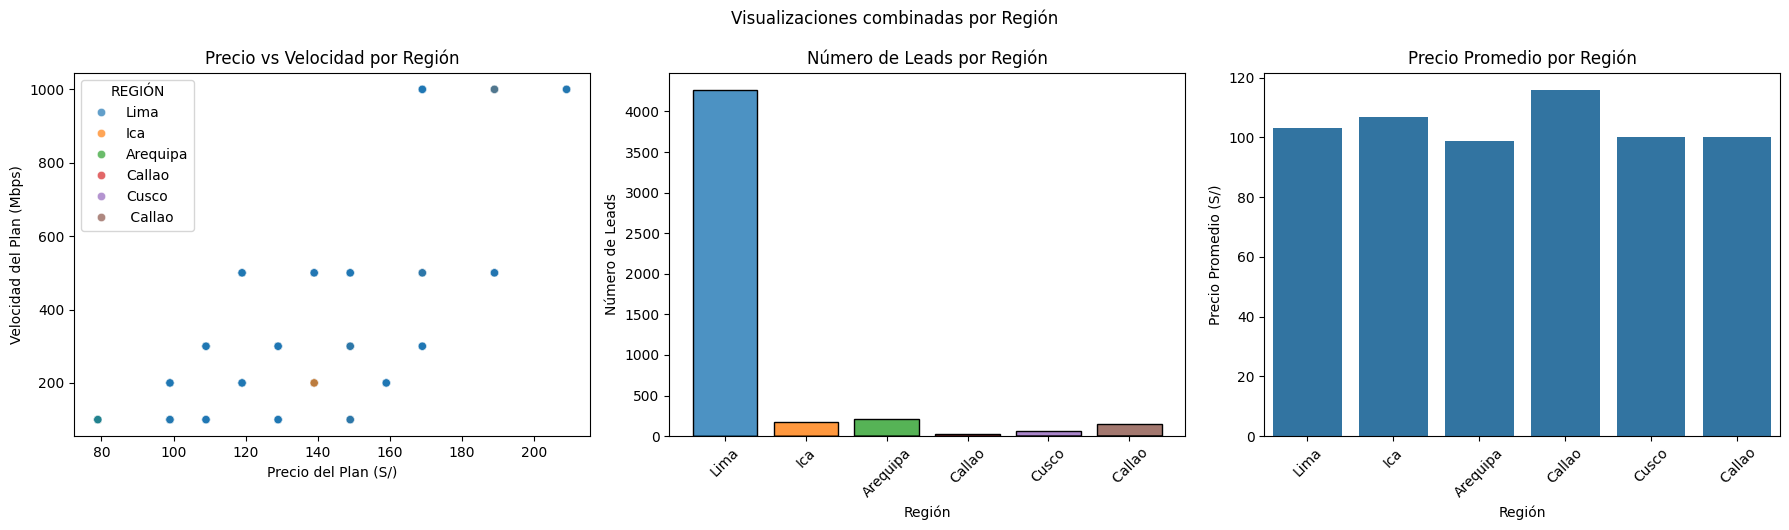

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the df_cobertura DataFrame which contains eligible leads
df_plot = df_cobertura.copy()

# Ensure numeric types for price and speed, handling potential errors
df_plot['PRECIO_NUM'] = df_plot['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_plot['VELOCIDAD_NUM'] = df_plot['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Create the figure with 3 subplots
f, axs = plt.subplots(1, 3, figsize=(18, 5), gridspec_kw=dict(width_ratios=[5, 5, 5]))

# 1️⃣ Scatterplot: Precio vs Velocidad por Región
sns.scatterplot(data=df_plot, x="PRECIO_NUM", y="VELOCIDAD_NUM", hue="REGIÓN", ax=axs[0], alpha=0.7)
axs[0].set_title("Precio vs Velocidad por Región")
axs[0].set_xlabel("Precio del Plan (S/)")
axs[0].set_ylabel("Velocidad del Plan (Mbps)")

# 2️⃣ Histograma: Número de leads por Región
sns.histplot(data=df_plot, x="REGIÓN", hue="REGIÓN", shrink=0.8, alpha=0.8, legend=False, ax=axs[1])
axs[1].set_title("Número de Leads por Región")
axs[1].set_xlabel("Región")
axs[1].set_ylabel("Número de Leads")
axs[1].tick_params(axis='x', rotation=45)

# 3️⃣ Barplot: Precio promedio por Región
sns.barplot(data=df_plot, x="REGIÓN", y="PRECIO_NUM", ax=axs[2], errorbar=None)
axs[2].set_title("Precio Promedio por Región")
axs[2].set_xlabel("Región")
axs[2].set_ylabel("Precio Promedio (S/)")
axs[2].tick_params(axis='x', rotation=45)

# Ajustes finales
f.tight_layout()
f.suptitle("Visualizaciones combinadas por Región", fontsize=12, y=1.05)
plt.show()

In [ ]:
# Filtrar solo las provincias de la REGIÓN Lima
df_lima = df_cobertura[df_cobertura['REGIÓN'] == 'Lima'].copy()

# Calcular Leads Totales por provincia (solo Región Lima)
provincia_lead_counts = df_lima['PROVINCIA'].value_counts().reset_index()
provincia_lead_counts.columns = ['PROVINCIA', 'Leads Totales']

# Calcular Leads Convertidos por provincia (solo Región Lima)
Leads_convertidos = df_lima[df_lima['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado'].copy()
Leads_convertidos_provincia = Leads_convertidos['PROVINCIA'].value_counts().reset_index()
Leads_convertidos_provincia.columns = ['PROVINCIA', 'Leads Convertidos']

# Unir resultados
provincia_conversion = pd.merge(provincia_lead_counts,
                                Leads_convertidos_provincia,
                                on='PROVINCIA',
                                how='left').fillna(0)

# Calcular tasa de conversión
provincia_conversion['Tasa de Conversión (%)'] = (
    provincia_conversion['Leads Convertidos'] / provincia_conversion['Leads Totales']
) * 100

# Mostrar provincias de la Región Lima ordenadas por leads totales
display(provincia_conversion.sort_values(by='Leads Totales', ascending=False))

,PROVINCIA,Leads Totales,Leads Convertidos,Tasa de Conversión (%)
0,Lima,4135,3981,96.275695
1,Cañete,51,50,98.039216
2,Huaral,43,41,95.348837
3,Huaura,30,30,100.000000
4,Huarochirí,1,1,100.000000
5,Canta,1,1,100.000000
6,Barranca,1,1,100.000000
7,Cajatambo,1,1,100.000000


,DISTRITO,Leads Totales,Leads Convertidos,Tasa de Conversión (%)
0,Lima,1442,380,26.352288
1,Miraflores,1165,291,24.978541
2,Santiago de Surco,1083,397,36.657433
3,Ate,879,300,34.129693
4,San Juan de Lurigancho,766,261,34.073107
5,Chorrillos,745,406,54.496644
6,Barranco,463,297,64.146868
7,San Martín de Porres,440,85,19.318182
8,San Borja,332,47,14.156627
9,La Victoria,325,63,19.384615


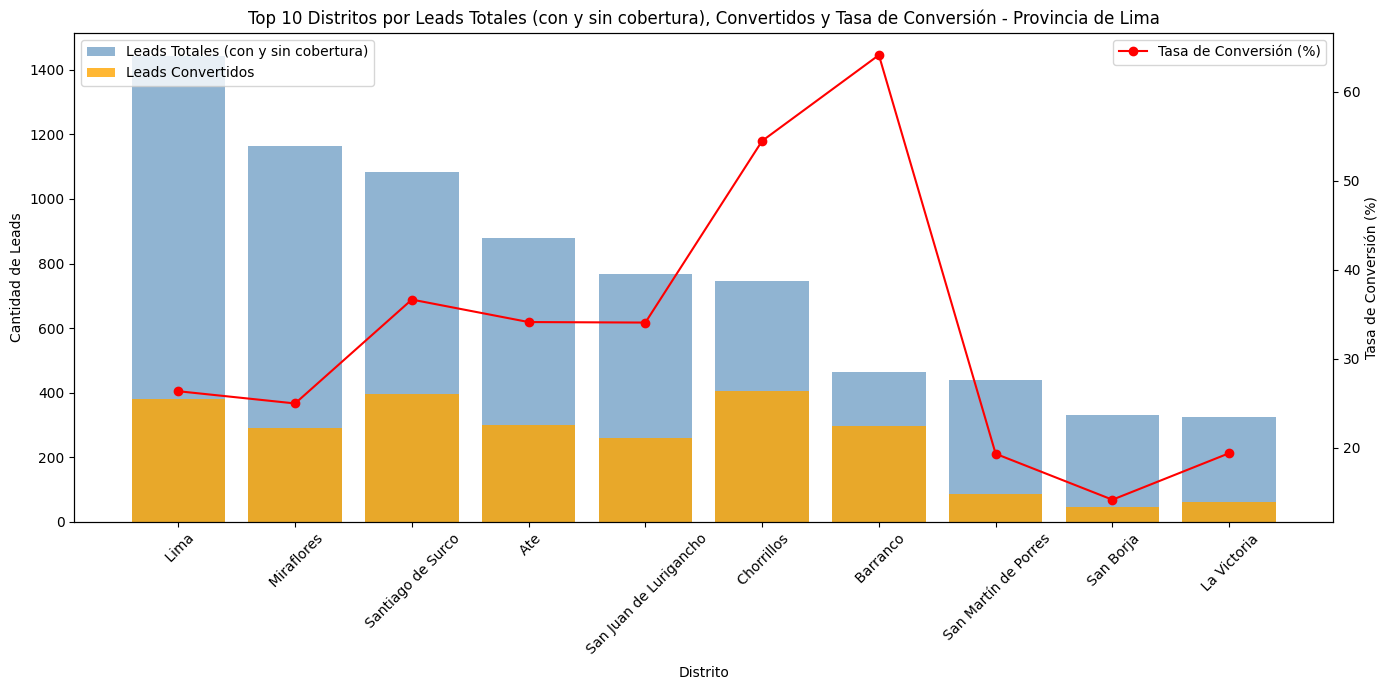

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Filtrar solo Región Lima y Provincia Lima en el DataFrame original ---
df_lima = df[(df['REGIÓN'] == 'Lima') & (df['PROVINCIA'] == 'Lima')].copy()

# --- Leads Totales por distrito ---
distrito_lead_counts = df_lima['DISTRITO'].value_counts().reset_index()
distrito_lead_counts.columns = ['DISTRITO', 'Leads Totales']

# --- Leads Convertidos (Contrato Cerrado) por distrito ---
distrito_leads_convertidos = df_lima[df_lima['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado']['DISTRITO'].value_counts().reset_index()
distrito_leads_convertidos.columns = ['DISTRITO', 'Leads Convertidos']

# --- Merge de ambos ---
distrito_conversion = pd.merge(distrito_lead_counts, distrito_leads_convertidos,
                               on='DISTRITO', how='left').fillna(0)

# --- Calcular tasa de conversión ---
distrito_conversion['Tasa de Conversión (%)'] = (distrito_conversion['Leads Convertidos'] /
                                                 distrito_conversion['Leads Totales']) * 100

# --- Ordenar por Leads Totales y seleccionar el top 10 ---
distrito_conversion = distrito_conversion.sort_values(by='Leads Totales', ascending=False).head(10)

# Mostrar tabla
display(distrito_conversion)

# --- Visualización Multivariada ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras = Leads Totales y Leads Convertidos
ax1.bar(distrito_conversion['DISTRITO'], distrito_conversion['Leads Totales'],
        label='Leads Totales (con y sin cobertura)', alpha=0.6, color='steelblue')
ax1.bar(distrito_conversion['DISTRITO'], distrito_conversion['Leads Convertidos'],
        label='Leads Convertidos', alpha=0.8, color='orange')
ax1.set_ylabel("Cantidad de Leads")
ax1.set_xlabel("Distrito")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc="upper left")

# Línea = Tasa de Conversión
ax2 = ax1.twinx()
ax2.plot(distrito_conversion['DISTRITO'], distrito_conversion['Tasa de Conversión (%)'],
         color='red', marker='o', label='Tasa de Conversión (%)')
ax2.set_ylabel("Tasa de Conversión (%)")
ax2.legend(loc="upper right")

plt.title("Top 10 Distritos por Leads Totales (con y sin cobertura), Convertidos y Tasa de Conversión - Provincia de Lima")
plt.tight_layout()
plt.show()

# 2. ¿Cómo influye la velocidad y el precio del plan en la probabilidad de que un lead muestre interés o contrate el servicio?
Hipótesis: Los leads tienden a mostrar mayor interés por planes con menor velocidad y precio acorde a su tipo de servicio.
Conclusión: El análisis muestra que los leads tienden a interesarse más por planes con precios moderados y velocidades adecuadas a su tipo de servicio, confirmando la hipótesis. Esto indica que precio y velocidad son variables relevantes para predecir la probabilidad de conversión. Incorporar estas características puede mejorar la capacidad predictiva del modelo y ayudar a identificar los planes que generan mayor interés según el tipo de lead (Hogar o Empresas).

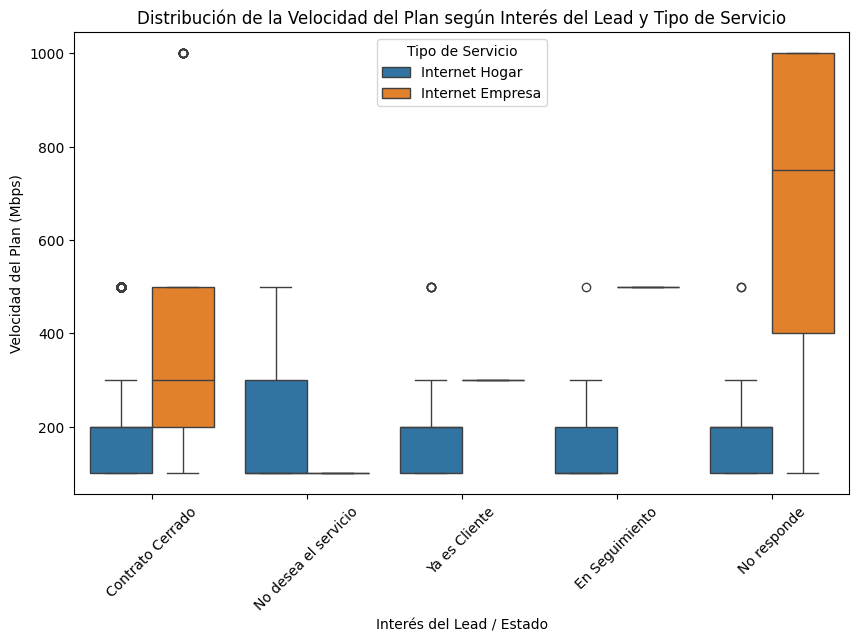

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric types for price and speed, handling potential errors
df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Boxplot Velocidad vs Interés del Lead
plt.figure(figsize=(10,6))
sns.boxplot(x="ESTADO DE ATENCIÓN", y="VELOCIDAD_NUM", hue="SERVICIO", data=df_cobertura)
plt.xlabel("Interés del Lead / Estado")
plt.ylabel("Velocidad del Plan (Mbps)")
plt.title("Distribución de la Velocidad del Plan según Interés del Lead y Tipo de Servicio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Servicio")
plt.show()

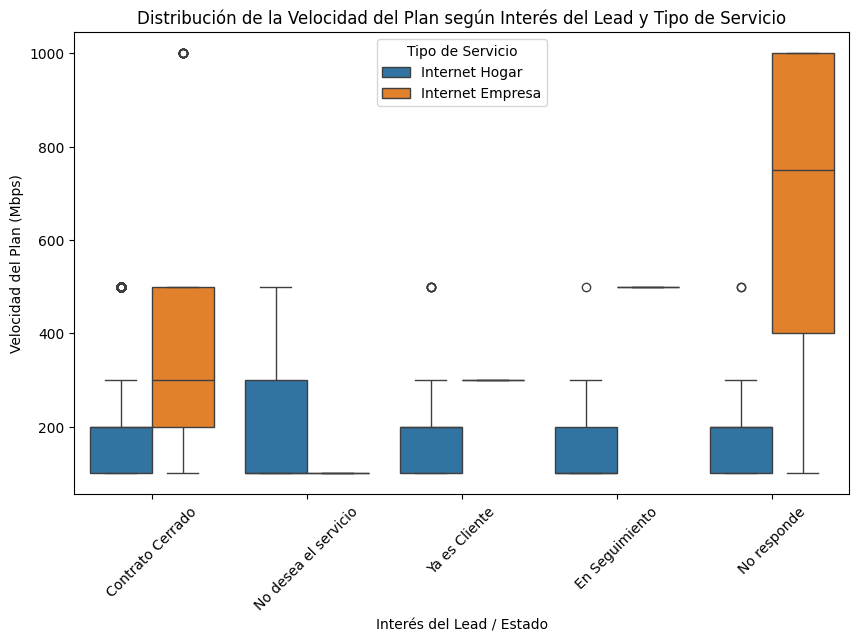

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Boxplot Velocidad vs Interés del Lead
plt.figure(figsize=(10,6))
sns.boxplot(x="ESTADO DE ATENCIÓN", y="VELOCIDAD_NUM", hue="SERVICIO", data=df_cobertura)
plt.xlabel("Interés del Lead / Estado")
plt.ylabel("Velocidad del Plan (Mbps)")
plt.title("Distribución de la Velocidad del Plan según Interés del Lead y Tipo de Servicio")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Servicio")
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure numeric types for price and speed, handling potential errors
df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Calculate total leads and converted leads for each unique combination of Service, Plan, Speed, and Base Price
plan_conversion = df_cobertura.groupby(['SERVICIO', 'PLAN', 'VELOCIDAD', 'PRECIO BASE']).agg(
    Total_Leads=('SERVICIO', 'size'),
    Converted_Leads=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

# Calculate Conversion Rate for each plan
plan_conversion['Conversion_Rate (%)'] = (plan_conversion['Converted_Leads'] / plan_conversion['Total_Leads']) * 100

# Ensure numeric types for the calculated columns for plotting
plan_conversion['PRECIO_NUM'] = plan_conversion['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
plan_conversion['VELOCIDAD_NUM'] = plan_conversion['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

# Create the scatter plot using Plotly Express
fig = px.scatter(
    plan_conversion,
    x='PRECIO_NUM',
    y='VELOCIDAD_NUM',
    size='Total_Leads',         # Size of bubbles based on total leads
    color='Conversion_Rate (%)', # Color based on Conversion Rate
    hover_name='PLAN',          # Show plan name on hover
    hover_data=['SERVICIO', 'VELOCIDAD', 'PRECIO BASE', 'Total_Leads', 'Converted_Leads', 'Conversion_Rate (%)'], # Additional info on hover
    size_max=60,                # Adjust size of markers (reduced from 100 to 60)
    title='Influencia del Precio y Velocidad del Plan en la Cantidad de Leads y Tasa de Conversión'
)

fig.update_layout(
    xaxis_title='Precio Base (S/)',
    yaxis_title='Velocidad del Plan (Mbps)'
)

fig.show()

#3. ¿Cómo se relaciona la cantidad de leads registrados en un distrito con la velocidad de los planes que suelen contratar?
Hipótesis: En los distritos con mayor cantidad de leads registrados, los leads tienen más probabilidad de contratar planes de menor velocidad.

Conclusión:
El análisis revela que en los distritos con mayor cantidad de leads registrados, los planes contratados tienden a ser de menor velocidad. Esto sugiere que la variable “cantidad de leads por distrito” puede ser un predictor relevante al estimar la velocidad del plan que un lead probablemente seleccionará. Además, incorporar esta información geográfica permite identificar patrones de demanda y ajustar la segmentación de ofertas de manera más precisa.

In [ ]:
import pandas as pd
import plotly.express as px

df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].str.replace('S/ ', '', regex=False).astype(float)


df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].str.replace(' Mbps', '', regex=False).astype(float)


df_cobertura['CONVERSION'] = (df_cobertura['ESTADO DE ATENCIÓN'] == 'Contrato Cerrado').astype(int)


lima = df_cobertura[
    (df_cobertura["REGIÓN"] == "Lima") &
    (df_cobertura["PROVINCIA"] == "Lima")
].copy()


if len(lima) > 0:
    # Agrupamos por DISTRITO y PLAN
    grp = lima.groupby(["DISTRITO", "PLAN"], dropna=False).agg(
        precio_prom=("PRECIO_NUM", "mean"),
        vel_prom=("VELOCIDAD_NUM", "mean"),
        leads=("CONVERSION", "size"),
        converted_leads=("CONVERSION", "sum")
    ).reset_index()


    plan_leads = grp.groupby('PLAN')['leads'].sum().reset_index()
    plan_leads = plan_leads.sort_values(by='leads', ascending=False)


    top_10_plans = plan_leads.head(10)['PLAN'].tolist()

    grp_top_10 = grp[grp['PLAN'].isin(top_10_plans)].copy()


    fig = px.scatter(
        grp_top_10,
        x="precio_prom",
        y="vel_prom",
        size="leads",
        color="DISTRITO",
        hover_name="PLAN",
        size_max=60,
        title="Precio vs Velocidad por Distrito-Plan en Lima (tamaño = # leads)"
    )

    fig.update_layout(
        xaxis_title="Precio promedio (S/)",
        yaxis_title="Velocidad promedio (Mbps)"
    )

    fig.show()
else:
    print("No hay registros para Provincia Lima - Región Lima")

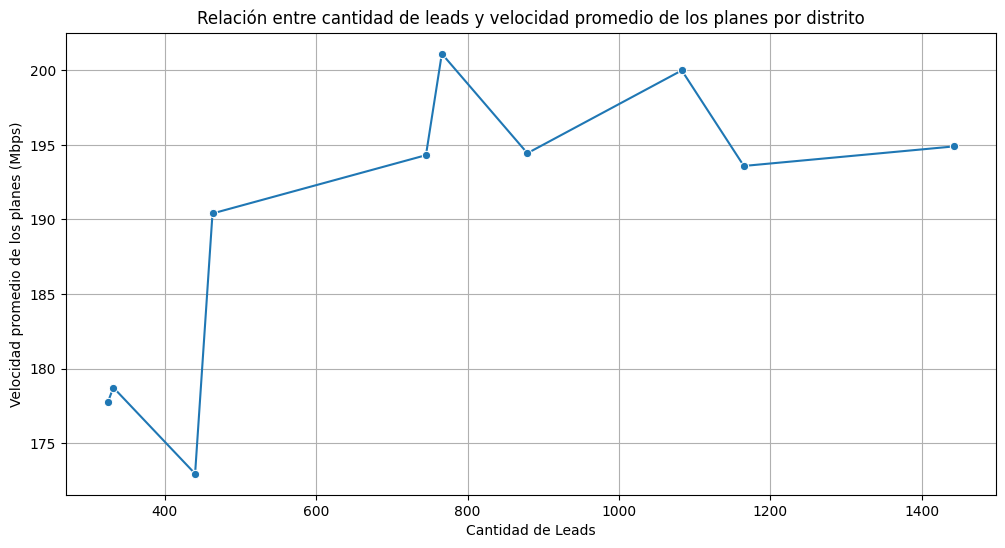

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)


district_avg_speed = df_cobertura.groupby('DISTRITO')['VELOCIDAD_NUM'].mean().reset_index()
district_avg_speed.columns = ['DISTRITO', 'Velocidad_Prom']

distrito_conversion = pd.merge(distrito_conversion, district_avg_speed, on='DISTRITO', how='left')

plt.figure(figsize=(12,6))
sns.lineplot(
    data=distrito_conversion.sort_values('Leads Totales'),
    x='Leads Totales',
    y='Velocidad_Prom',
    marker='o'
)

plt.title("Relación entre cantidad de leads y velocidad promedio de los planes por distrito")
plt.xlabel("Cantidad de Leads")
plt.ylabel("Velocidad promedio de los planes (Mbps)")
plt.grid(True)
plt.show()

#4. ¿Cómo influye el tipo de servicio del lead (Hogar o Empresa) en la probabilidad de que contrate un plan de internet de alta velocidad?
Hipótesis: El tipo de servicio solicitado por el lead (Hogar o Empresa) influye en la elección de la velocidad del plan: los leads de internet empresarial tienen mayor probabilidad de elegir planes de alta velocidad, mientras que los leads de internet hogar tienden a elegir planes de menor velocidad.

Conclusión: El análisis muestra que el tipo de servicio del lead influye claramente en la elección de la velocidad del plan. Los leads de internet empresarial presentan una mayor probabilidad de seleccionar planes de alta velocidad, mientras que los leads de internet hogar tienden a optar por planes de menor velocidad. Incorporar esta información permitirá mejorar la precisión de las predicciones y optimizar la segmentación de ofertas según el tipo de cliente.

In [ ]:
df_lima = df[df['REGIÓN'] == 'Lima'].copy()

unique_geo_combinations = df_lima[['REGIÓN', 'PROVINCIA', 'DISTRITO']].drop_duplicates()
display(unique_geo_combinations)

,REGIÓN,PROVINCIA,DISTRITO
2,Lima,Lima,Barranco
3,Lima,Lima,Magdalena del Mar
5,Lima,Lima,San Borja
7,Lima,Lima,Chorrillos
8,Lima,Lima,Carabayllo
...,...,...,...
10932,Lima,Barranca,Pativilca
11318,Lima,Huaura,Vegueta
13830,Lima,Lima,Alto de la Alianza
14189,Lima,Huarochirí,Santo Domingo de Los Olleros


In [ ]:
import pandas as pd
import plotly.express as px

df_cobertura['PRECIO_NUM'] = df_cobertura['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
df_cobertura['VELOCIDAD_NUM'] = df_cobertura['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

plan_conversion = df_cobertura.groupby(['SERVICIO', 'PLAN', 'VELOCIDAD', 'PRECIO BASE']).agg(
    Total_Leads=('SERVICIO', 'size'),
    Converted_Leads=('ESTADO DE ATENCIÓN', lambda x: (x == 'Contrato Cerrado').sum())
).reset_index()

plan_conversion['Conversion_Rate (%)'] = (plan_conversion['Converted_Leads'] / plan_conversion['Total_Leads']) * 100

plan_conversion['PRECIO_NUM'] = plan_conversion['PRECIO BASE'].astype(str).str.replace('S/ ', '', regex=False).astype(float)
plan_conversion['VELOCIDAD_NUM'] = plan_conversion['VELOCIDAD'].astype(str).str.replace(' Mbps', '', regex=False).astype(float)

fig = px.scatter(
    plan_conversion,
    x='PRECIO_NUM',
    y='VELOCIDAD_NUM',
    size='Total_Leads',
    color='SERVICIO',
    hover_name='PLAN',
    hover_data=['VELOCIDAD', 'PRECIO BASE', 'Total_Leads', 'Converted_Leads', 'Conversion_Rate (%)'],
    size_max=100,
    title='Influencia del Precio y Velocidad del Plan en la Cantidad de Leads por Tipo de Servicio'
)

fig.update_layout(
    xaxis_title='Precio Base (S/)',
    yaxis_title='Velocidad del Plan (Mbps)'
)

fig.show()

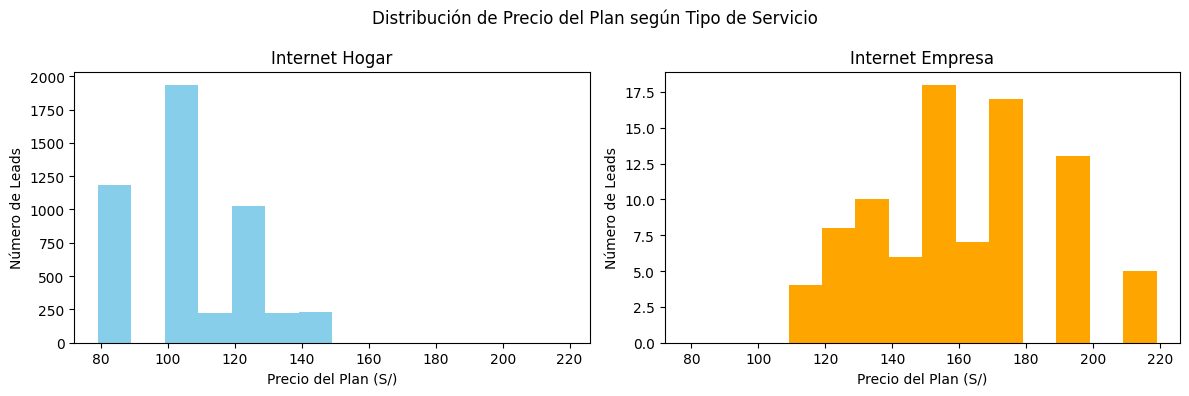

In [ ]:
import matplotlib.pyplot as plt

# Filter data for each service type from df_cobertura
hogar_precio = df_cobertura[df_cobertura["SERVICIO"]=="Internet Hogar"]["PRECIO_NUM"].dropna()
empresas_precio = df_cobertura[df_cobertura["SERVICIO"]=="Internet Empresa"]["PRECIO_NUM"].dropna()

# Define a common bin range based on the overall price range in df_cobertura
if not df_cobertura['PRECIO_NUM'].empty:
    min_price = int(df_cobertura['PRECIO_NUM'].min())
    max_price = int(df_cobertura['PRECIO_NUM'].max())
    bin_range = range(min_price, max_price + 20, 10) # Added +20 to ensure max is included in a bin boundary

    # Crear histogramas separados para tipo de servicio (Hogar vs Empresas)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Hogar
    axs[0].hist(hogar_precio,
                color="skyblue", bins=bin_range)
    axs[0].set_title("Internet Hogar")
    axs[0].set_xlabel("Precio del Plan (S/)")
    axs[0].set_ylabel("Número de Leads")

    # Empresas
    axs[1].hist(empresas_precio,
                color="orange", bins=bin_range)
    axs[1].set_title("Internet Empresa")
    axs[1].set_xlabel("Precio del Plan (S/)")
    axs[1].set_ylabel("Número de Leads")

    fig.suptitle("Distribución de Precio del Plan según Tipo de Servicio")
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame df_cobertura o la columna PRECIO_NUM están vacíos.")